In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('/Flight Fare Prediction Project/dataset/Train_Preprocessed.csv')
data_test = pd.read_csv('/Flight Fare Prediction Project/dataset/Test_Preprocessed.csv')
pd.set_option('display.max_columns', None)

In [3]:
data_train.head()

,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minutes,2 stops,3 stops,4 stops,non-stop,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection

<AxesSubplot:>

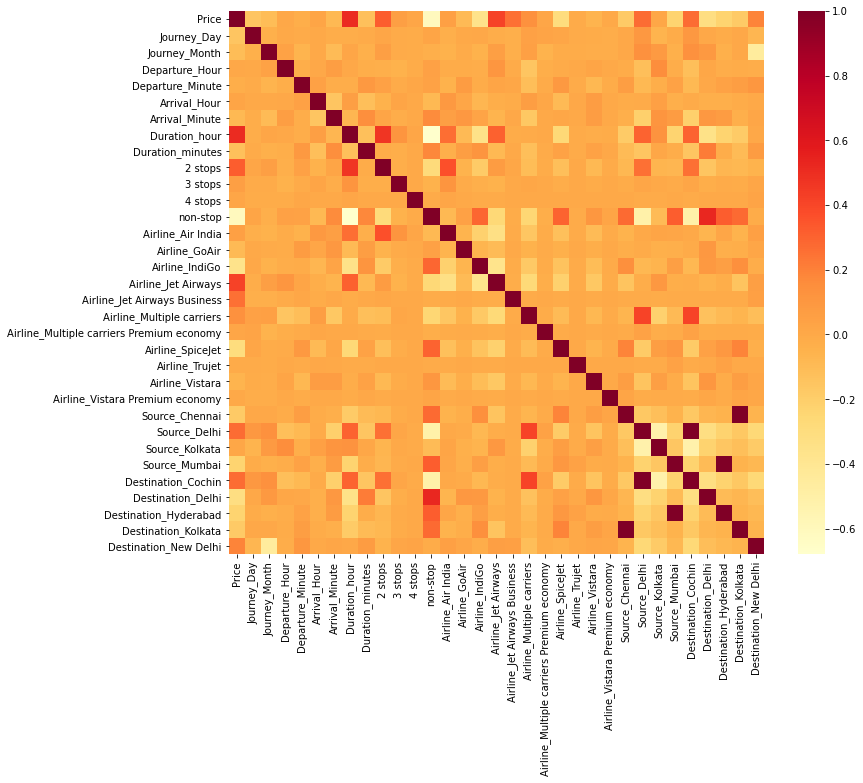

In [4]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(data_train.corr(), cbar=True, cmap='YlOrRd')

In [5]:
X = data_train.iloc[:, 1:]
y = data_train.iloc[:, 0]

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selection = ExtraTreesRegressor()

feature_selection.fit(X, y)
print(feature_selection.feature_importances_)

[1.44061389e-01 5.33806939e-02 2.31419505e-02 2.14465330e-02
 2.88882233e-02 2.02556379e-02 4.51691744e-02 1.69241148e-02
 2.23007934e-02 3.55894183e-03 5.43146216e-05 3.71793836e-01
 6.65850447e-03 1.35766289e-03 3.01227110e-02 7.77895905e-02
 6.51436239e-02 1.51005702e-02 9.49236869e-04 2.42705572e-03
 1.64880827e-04 4.13448934e-03 8.01267932e-05 4.37787345e-04
 3.12673998e-03 3.80528694e-03 4.04757591e-03 3.07782713e-03
 6.33992751e-04 5.43808071e-03 4.74142836e-04 2.40545118e-02]


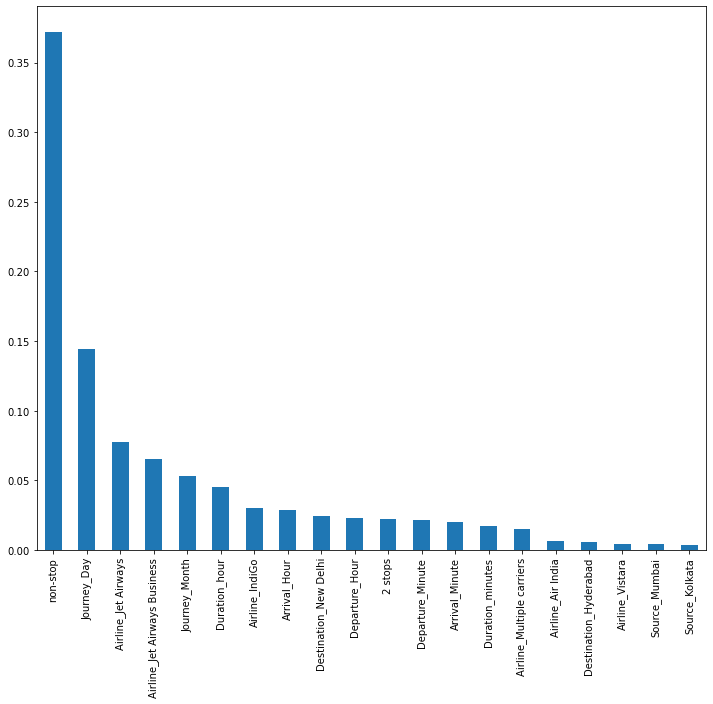

In [7]:
plt.figure(figsize=(12, 10))
feature_importance = pd.Series(feature_selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='bar')
plt.show()